C:\Users\Dios_\AppData\Local\Temp/ipykernel_11780/275824747.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['Date_reported'] = xx['Date_reported'].astype('category').cat.codes


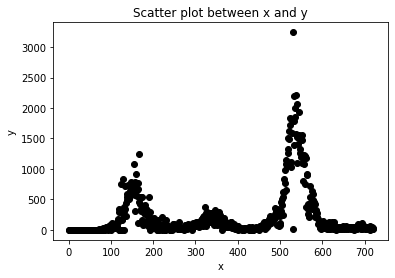

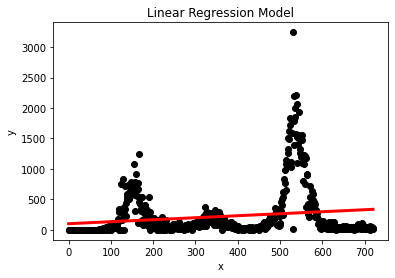

w = [ 0.00000000e+00  8.91959382e+00 -5.90067271e-02  1.40788347e-04
 -1.06466285e-07], b = -209.93682183890007


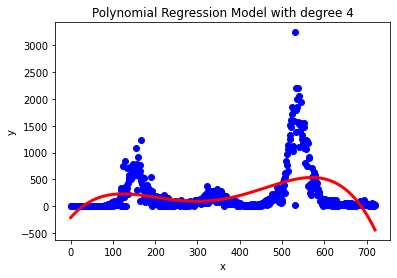

    degree        RMSE
0        0  395.329500
1        1  389.405093
2        2  384.418852
3        3  374.045219
4        4  348.052811
5        5  345.321600
6        6  315.589267
7        7  306.220692
8        8  314.144242
9        9  320.357871
10      10  317.824145
11      11  308.027257
12      12  296.705730
13      13  289.786559
14      14  289.806911
15      15  295.084492
16      16  310.278629
17      17  307.399928
18      18  308.290888
19      19  312.730194
20      20  319.865881
21      21  328.614074
22      22  337.962010
23      23  347.121480
24      24  355.564176
25      25  362.992391


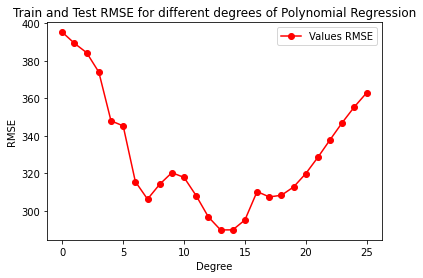

y = 187.1021131655442 +(-2.038146112675813e-21)x1 +(-4.22295416102192e-25)x2 +(1.7538119793676944e-29)x3 +(-3.2422210118701624e-31)x4 +(-8.956969049900654e-29)x5 +(-2.488954457748248e-26)x6 +(-5.977152870713367e-24)x7 +(-1.1267866708899067e-21)x8 +(-1.2865053487900224e-19)x9 +(8.67785876391522e-22)x10 +(-2.1648563588341307e-24)x11 +(2.3726500711843684e-27)x12 +(-9.655830332117693e-31)x13


In [11]:

from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

pos1 = 0
pos2 = 0
col_list = ['Date_reported', 'Country', 'New_cases'] # String 
dataset = pd.read_csv('WHO-COVID-19-global-data.csv', usecols=col_list)

xx = dataset.loc[dataset['Country'] == 'Afghanistan']
xx['Date_reported'] = xx['Date_reported'].astype('category').cat.codes

pos1 = dataset.columns.get_loc('Date_reported')
pos11 = pos1-1
pos2 = dataset.columns.get_loc('New_cases')

X = xx.iloc[:, pos1].values
X = X.reshape(-1, 1)

yy = dataset.loc[dataset['Country'] == 'Afghanistan']
y = yy.iloc[:, pos2].values


plt.plot(X, y, 'ko')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot between x and y')
plt.show()
#-----------------------------------------------------------------
model = LinearRegression()
model.fit(X, y)

model_curve = model.predict(X)
plt.plot(X[:, 0], y, 'ko')
plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Model')
plt.show()
#------------------------------------------------------------------
features = PolynomialFeatures(degree=4)
x_train_transformed = features.fit_transform(X)


model = LinearRegression()
model.fit(x_train_transformed, y)


x_true_transformed = features.fit_transform(X)
model_curve = model.predict(x_true_transformed)

print('w = ' + str(model.coef_) +
      ', b = ' + str(model.intercept_))

plt.plot(X[:, 0], y, 'bo')
plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Polynomial Regression Model with degree 4')
plt.show()
#----------------------------------------------------------------


def poly_reg(degrees, x_train, y_train, plot=False):
    features = PolynomialFeatures(degree=degrees)
    x_train_transformed = features.fit_transform(x_train)
    model = LinearRegression()
    model.fit(x_train_transformed, y_train)

    train_pred = model.predict(x_train_transformed)
    rmse_poly_train = mean_squared_error(y_train, train_pred, squared=False)


    if plot == True:
        plt.plot(x_train[:, 0], y_train, 'ko')
        plt.plot(X[:, 0], model_curve, 'r-', linewidth=3)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Linear Regression Model')
        plt.show()

    return [rmse_poly_train]


errors = []

for i in range(26):
    errors.append([i] + poly_reg(i, X, y))

bestdegree = np.argmin(errors, axis=0)[1]

df = pd.DataFrame(errors, columns=['degree', 'RMSE'])

print(df)

plt.plot(df['degree'], df['RMSE'], 'o-r', label='Values RMSE')
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.legend()
plt.title('Train and Test RMSE for different degrees of Polynomial Regression')
plt.show()

bestdegree = np.argmin(errors, axis=0)[1]
features2 = PolynomialFeatures(degree=bestdegree)

x_train_transformed2 = features2.fit_transform(X)

model3 = LinearRegression()
model3.fit(x_train_transformed2, y)

x_true_transformed2 = features2.fit_transform(X)
model_curve3 = model3.predict(x_true_transformed2)
mse = mean_squared_error(y_true=y, y_pred=model_curve3)
rmse = np.sqrt(mse)
r2 = r2_score(y_true=y, y_pred=model_curve3)
coefs = model3.coef_
eq = "y = "+ str(model3.intercept_)
for i in range(len(coefs)):
    if i != 0:
        eq += " +(" + str(coefs[i])+")x"+str(i)
    
print(eq)
